<a href="https://colab.research.google.com/github/amaljoseph/TensorflowLearnings/blob/master/TFClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Default title text
!git clone https://github.com/amaljoseph/TensorflowLearnings

Cloning into 'TensorflowLearnings'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 64 (delta 21), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (64/64), done.


In [0]:
import pandas as pd

In [0]:
diabetes = pd.read_csv('TensorflowLearnings/udemy-datasets/02-TensorFlow-Basics/pima-indians-diabetes.csv')

In [3]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [0]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree',]

In [0]:
#to normalize
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x:(x-x.min())/ (x.max()-x.min()))

In [0]:
import tensorflow as tf

In [0]:
#continious features
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricpe = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')


In [0]:
# categorical variables - 2 methods - hash bucket + voacb list

#vocab list - easy if less number of features
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])

In [0]:
# hash bucket - hash_bucket_size=max no of features i expect there is
assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

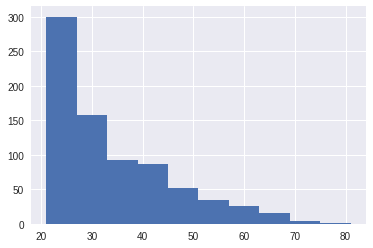

In [11]:
diabetes['Age'].hist(bins=10)

In [0]:
#not best every scenario
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [0]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricpe, insulin, bmi, diabetes_pedigree, assigned_group, age_bucket]

In [0]:
# train test splt
x_data = diabetes.drop('Class', axis=1)
labels = diabetes['Class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [17]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpgqxsx0h9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f63d169d9e8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [18]:
model.train(input_fn=input_func, steps=1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpgqxsx0h9/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 0
INFO:tensorflow:global_step/sec: 97.9949
INFO:tensorflow:loss = 3.3481827, step = 100 (1.025 sec)
INFO:tensorflow:global_step/sec: 113.205
INFO:tensorflow:loss = 5.848057, step = 200 (0.881 sec)
INFO:tensorflow:global_step/sec: 114.578
INFO:tensorflow:loss = 8.356453, step = 300 (0.876 sec)
INFO:tensorflow:global_step/sec: 115.706
INFO:tensorflow:loss = 6.438527, step = 400 (0.864 sec)
INFO:ten

In [0]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [20]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-01-20-11:15:27
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpgqxsx0h9/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-01-20-11:15:27
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74891776, accuracy_baseline = 0.64935064, auc = 0.8031688, auc_precision_recall = 0.65217155, average_loss = 0.5215977, global_step = 1000, label/mean = 0.35064936, loss = 5.0203776, precision = 0.6769231, prediction/mean = 0.35109338, recall = 0.54320985
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpgqxsx0h9/model.ckpt-1000


In [21]:
results

{'accuracy': 0.74891776,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8031688,
 'auc_precision_recall': 0.65217155,
 'average_loss': 0.5215977,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0203776,
 'precision': 0.6769231,
 'prediction/mean': 0.35109338,
 'recall': 0.54320985}

In [0]:
#pedictions
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1, shuffle=False)

In [0]:
predictions = model.predict(pred_input_func)

In [0]:
#Dense NN Classifier

In [0]:
#for dense NN, need to use embedded columns with categorical columns
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)
feat_cols = [num_preg, plasma_gluc, dias_press, tricpe, insulin, bmi, diabetes_pedigree, embedded_group_col, age_bucket]

In [38]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpzh3hs329', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f63cfb954a8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [39]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpzh3hs329/model.ckpt.
INFO:tensorflow:loss = 6.92436, step = 0
INFO:tensorflow:global_step/sec: 95.0131
INFO:tensorflow:loss = 4.3904753, step = 100 (1.054 sec)
INFO:tensorflow:global_step/sec: 117.208
INFO:tensorflow:loss = 5.443129, step = 200 (0.856 sec)
INFO:tensorflow:global_step/sec: 116.263
INFO:tensorflow:loss = 7.6100836, step = 300 (0.859 sec)
INFO:tensorflow:global_step/sec: 119.19
INFO:tensorflow:loss = 6.2186832, step = 400 (0.837 sec)
INFO:tensorflow:global_step/sec: 116.359
INFO:tensorflow:loss = 5.298856, step = 500 (0.859 sec)
INFO:tensorflow:global_step/sec: 117.629
INFO:tensorflow:loss = 2.9399343, step = 600 (0.853 sec)
INFO:tensorflow:global_step/sec: 117.301
INFO:tensorflow:loss 

In [0]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=1, num_epochs=1, shuffle=False)

In [41]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-01-20-11:24:49
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpzh3hs329/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-01-20-11:24:51
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7316017, accuracy_baseline = 0.64935064, auc = 0.82189304, auc_precision_recall = 0.6698431, average_loss = 0.5354446, global_step = 1000, label/mean = 0.35064936, loss = 0.5354446, precision = 0.58715594, prediction/mean = 0.45586398, recall = 0.79012346
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpzh3hs329/model.ckpt-1000


{'accuracy': 0.7316017,
 'accuracy_baseline': 0.64935064,
 'auc': 0.82189304,
 'auc_precision_recall': 0.6698431,
 'average_loss': 0.5354446,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 0.5354446,
 'precision': 0.58715594,
 'prediction/mean': 0.45586398,
 'recall': 0.79012346}